#Load Data
###Querying the data directly from the website for our reference

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pymc as pm
import seaborn as sns
import arviz as az
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)

df = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features)
df['target'] = breast_cancer_wisconsin_diagnostic.data.targets
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X = pd.DataFrame(X, columns=df.columns[:-1])
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

###Descriptive Statistics
#####1. Checking number of rows and columns
#####2. Generating Descriptive Statistics (Mean, Median, Mode etc.)
#####3. Check for value counts of diagnosis variable (Malignant vs Benign Entries)

In [ ]:
print(df.shape)
print(df.describe())
print(df['target'].value_counts())
#give complete dataset descriptive stats
df.describe(include='all')
#omit unique, top and freq and target variable
df.describe(include='all').loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

(569, 31)
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920    0.02956

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


###Visualizations
#####1. Plot historgrams for feature distribution
#####2. Correlation Heatmaps (To check for highly correlated variables)
#####3. Visualize pairwise relationships between features and target variable

<Figure size 900x900 with 0 Axes>

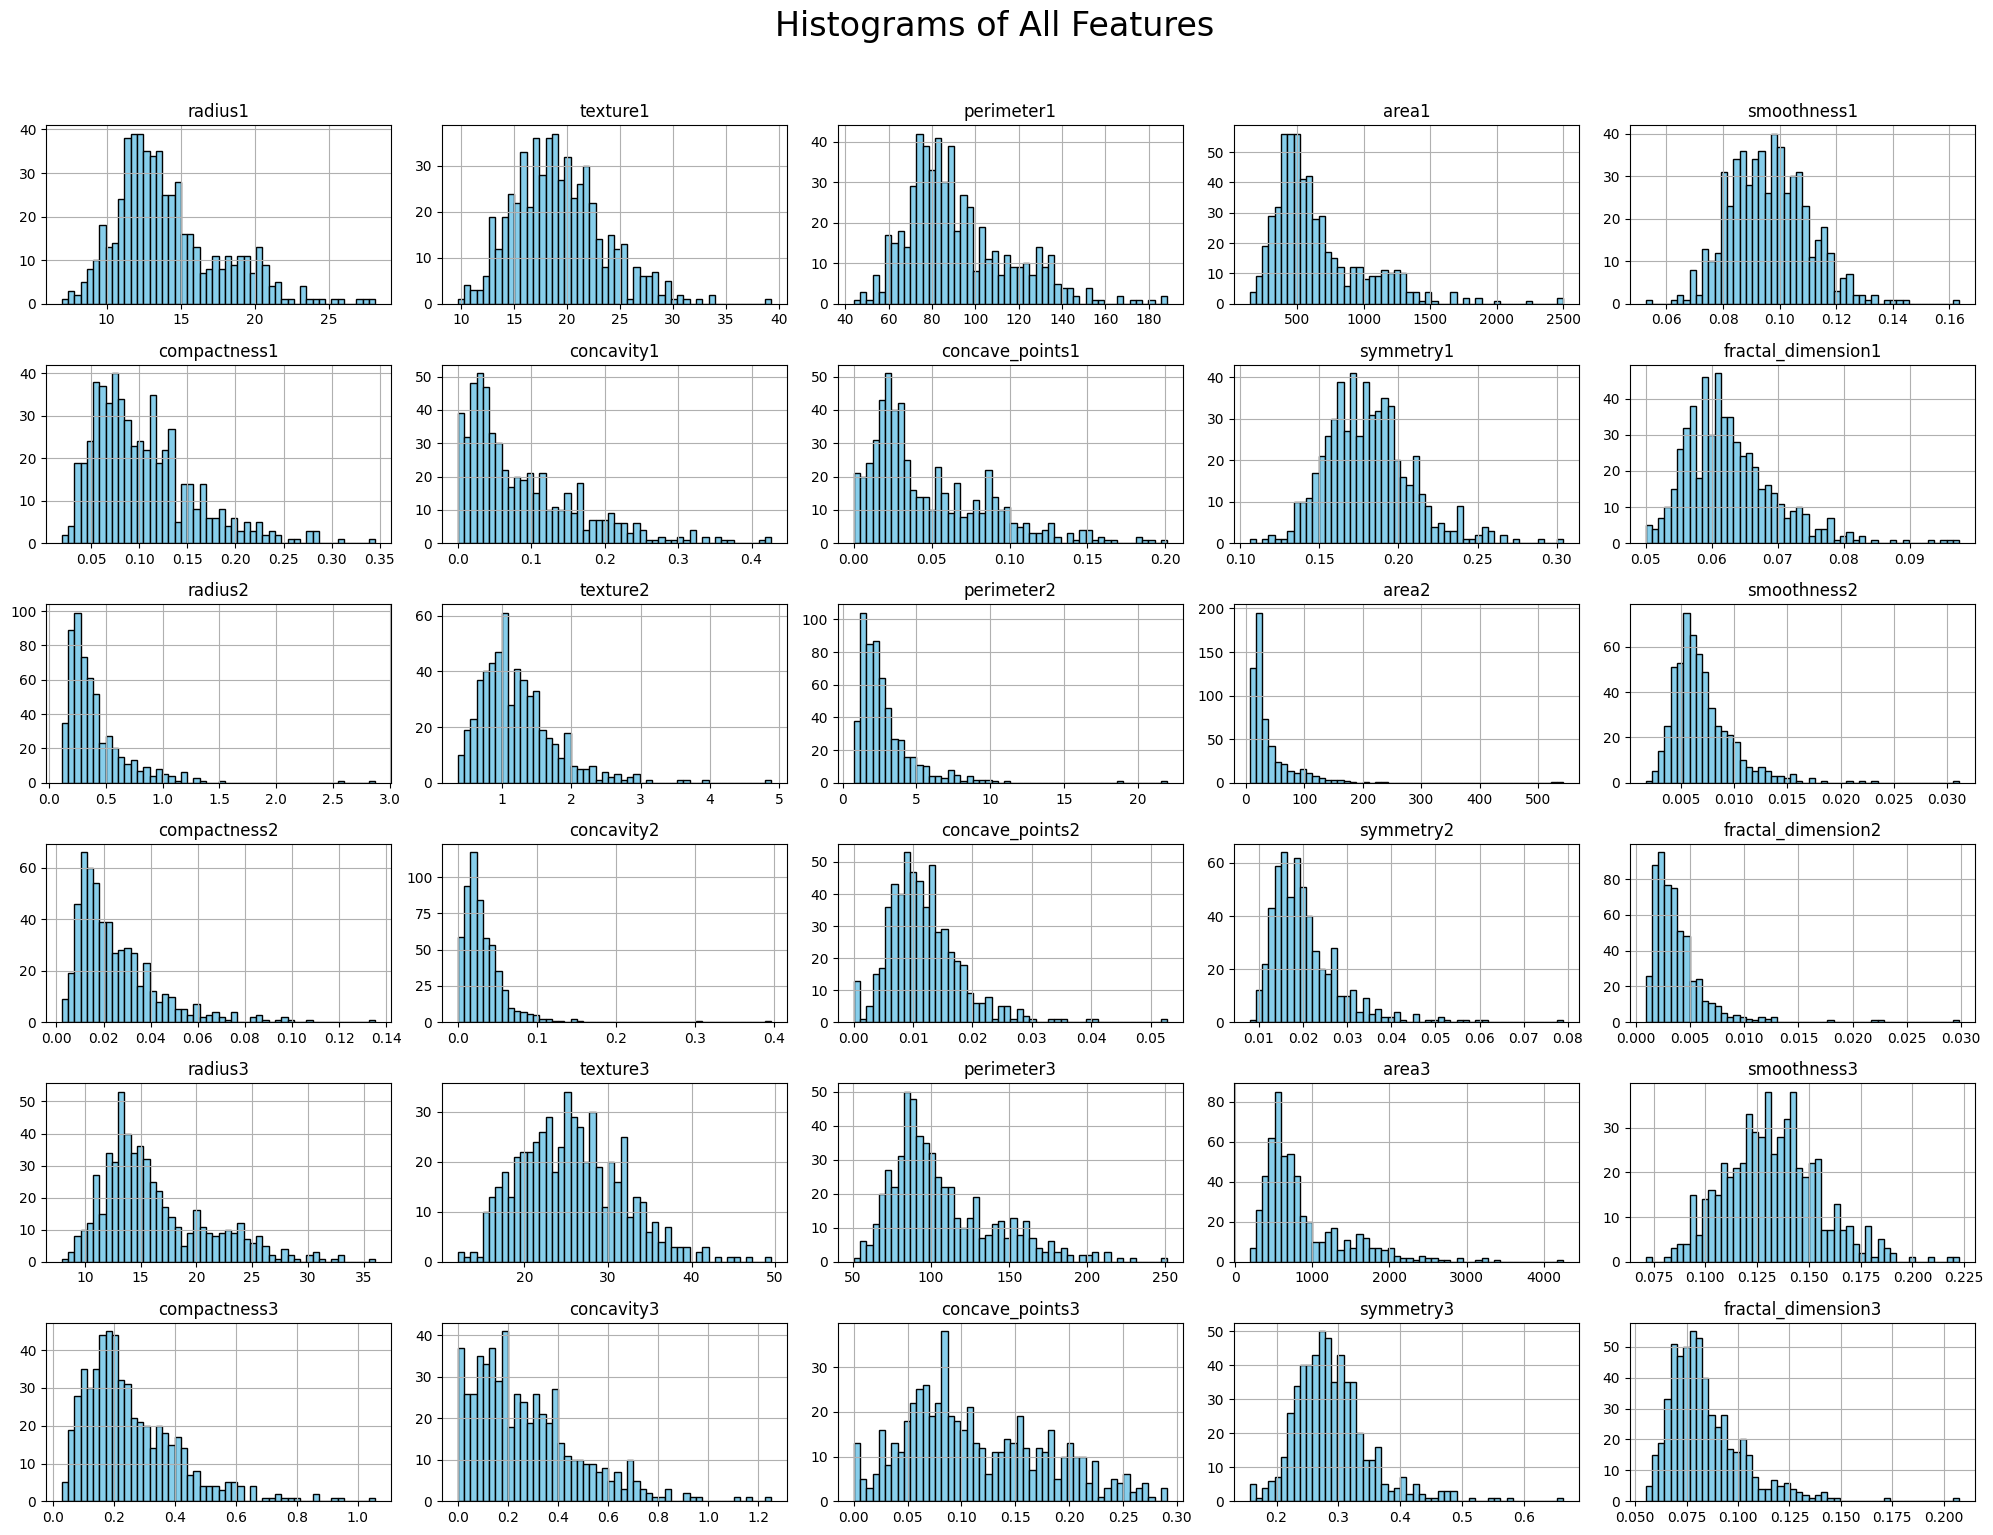

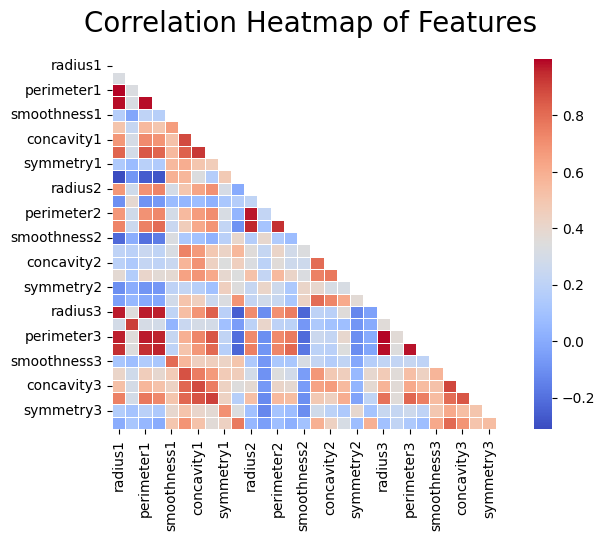

In [ ]:
#Histogram
plt.figure(figsize=(9,9))
X.hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features', fontsize=24, y=1.02)
plt.tight_layout()
plt.show()
#Correlation Heatmaps
corr_matrix = X.corr()
#masking upper triangle for better readibility
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=20, pad=20)
plt.show()

In [ ]:
# #Visualizing pairwise relationships
# sns.pairplot(df, hue='target')
# plt.suptitle('Pairwise Relationships between Features and Target', fontsize=24, y=1.02)
# plt.show()

<ipython-input-5-b81dae55cd17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=X[feature], palette='Set2')  # Boxplot of feature by target
<ipython-input-5-b81dae55cd17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=X[feature], palette='Set2')  # Boxplot of feature by target
<ipython-input-5-b81dae55cd17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=X[feature], palette='Set2')  # Boxplot of feature by target
<ipython-input-5-b81dae55cd17>:6: FutureWarning: 

Passing `palette

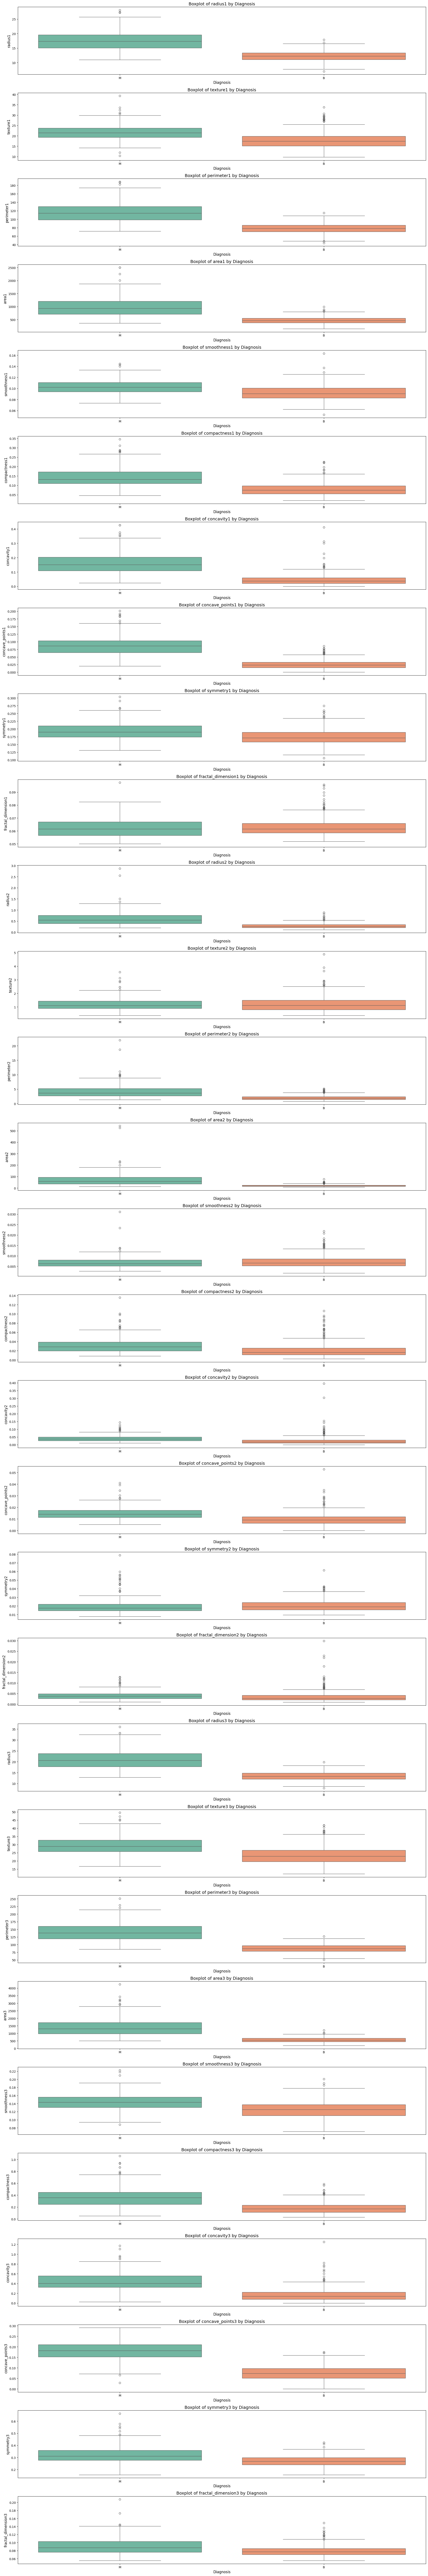

In [ ]:
#Creating boxplots
target_col = 'target'
plt.figure(figsize=(20, len(X.columns) * 4))
for i, feature in enumerate(X.columns):
    plt.subplot(len(X.columns), 1, i + 1)
    sns.boxplot(x=df[target_col], y=X[feature], palette='Set2')  # Boxplot of feature by target
    plt.title(f'Boxplot of {feature} by Diagnosis', fontsize=14)
    plt.xlabel("Diagnosis", fontsize=12)
    plt.ylabel(feature, fontsize=12)

# Adjust spacing between plots
plt.tight_layout()
plt.show()

<ipython-input-6-e9ed144f8d2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=X[feature], palette='Pastel1', split=True)  # Violin plot of feature by target
<ipython-input-6-e9ed144f8d2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=X[feature], palette='Pastel1', split=True)  # Violin plot of feature by target
<ipython-input-6-e9ed144f8d2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=X[feature], palette='Pastel1', split=True)  # Violin plot of feature by target
<

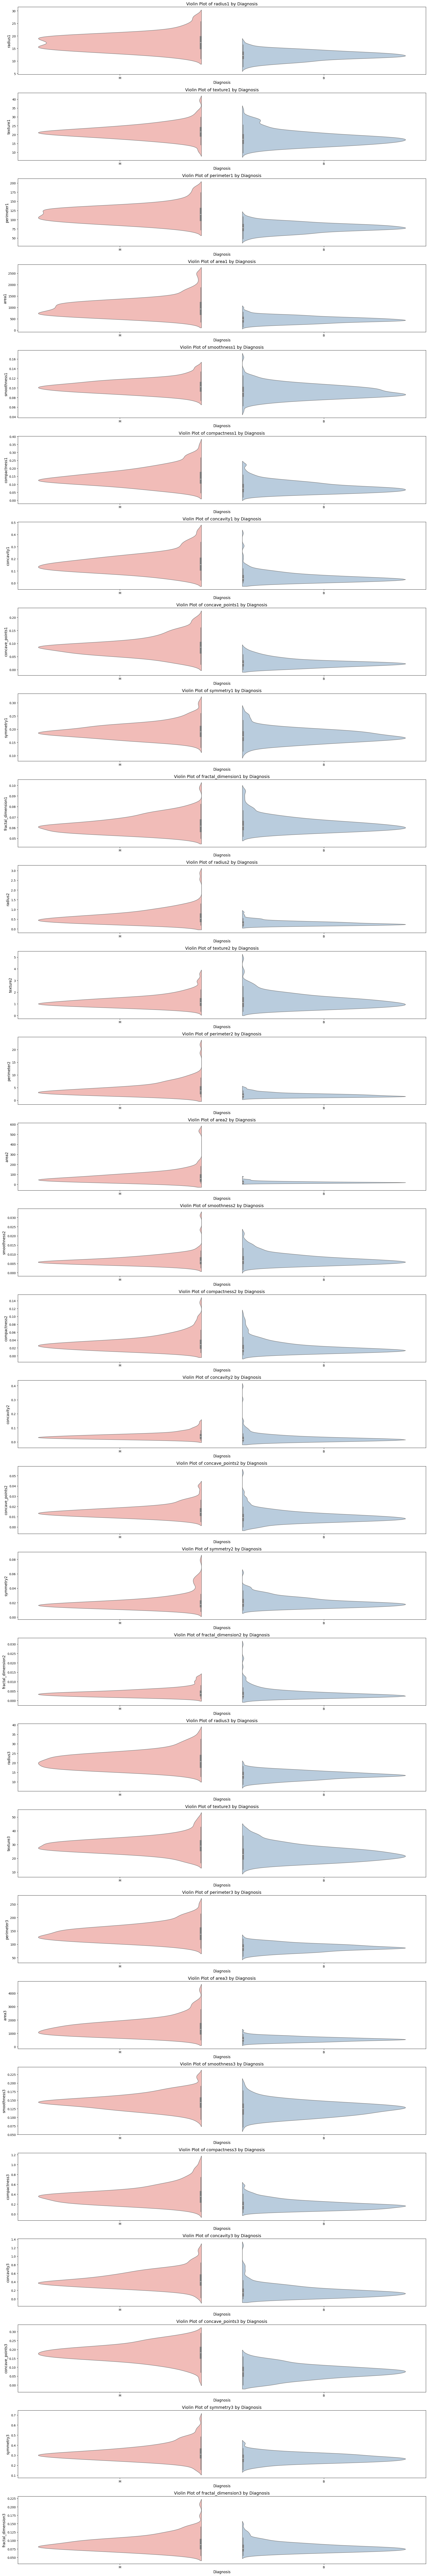

In [ ]:
#Create violin plots
plt.figure(figsize=(20, len(X.columns) * 4))
for i, feature in enumerate(X.columns):
    plt.subplot(len(X.columns), 1, i + 1)
    sns.violinplot(x=df[target_col], y=X[feature], palette='Pastel1', split=True)  # Violin plot of feature by target
    plt.title(f'Violin Plot of {feature} by Diagnosis', fontsize=14)
    plt.xlabel("Diagnosis", fontsize=12)
    plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

###Determining feature significance when it comes to determining whether the diagnosis is malignant or benign

#####T-Test for testing feature significance and extracting features which are most significant for two groups

In [ ]:
from scipy.stats import ttest_ind

group1 = df[df['target'] == 'M']
group2 = df[df['target'] == 'B']

# Perform t-tests for all features
t_test_results = {}
for feature in X.columns:
    t_stat, p_value = ttest_ind(group1[feature], group2[feature], equal_var=False)  # Welch's t-test
    t_test_results[feature] = {'t_stat': t_stat, 'p_value': p_value}

# Display features with significant differences (p-value < 0.05)
significant_features = {k: v for k, v in t_test_results.items() if v['p_value'] < 0.05}
print("Significant Features (p-value < 0.05):")
for feature, stats in significant_features.items():
    print(f"{feature}: t-stat = {stats['t_stat']:.2f}, p-value = {stats['p_value']:.5f}")


Significant Features (p-value < 0.05):
radius1: t-stat = 22.21, p-value = 0.00000
texture1: t-stat = 11.02, p-value = 0.00000
perimeter1: t-stat = 22.94, p-value = 0.00000
area1: t-stat = 19.64, p-value = 0.00000
smoothness1: t-stat = 9.30, p-value = 0.00000
compactness1: t-stat = 15.82, p-value = 0.00000
concavity1: t-stat = 20.33, p-value = 0.00000
concave_points1: t-stat = 24.84, p-value = 0.00000
symmetry1: t-stat = 8.11, p-value = 0.00000
radius2: t-stat = 13.30, p-value = 0.00000
perimeter2: t-stat = 12.83, p-value = 0.00000
area2: t-stat = 12.16, p-value = 0.00000
compactness2: t-stat = 7.08, p-value = 0.00000
concavity2: t-stat = 6.92, p-value = 0.00000
concave_points2: t-stat = 10.74, p-value = 0.00000
fractal_dimension2: t-stat = 2.04, p-value = 0.04220
radius3: t-stat = 24.83, p-value = 0.00000
texture3: t-stat = 12.26, p-value = 0.00000
perimeter3: t-stat = 25.33, p-value = 0.00000
area3: t-stat = 20.57, p-value = 0.00000
smoothness3: t-stat = 10.82, p-value = 0.00000
compa

###Testing Feature Importance

#####Fitting a random forest classifier for determining most important features for prediction


<ipython-input-12-e4148e01f724>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


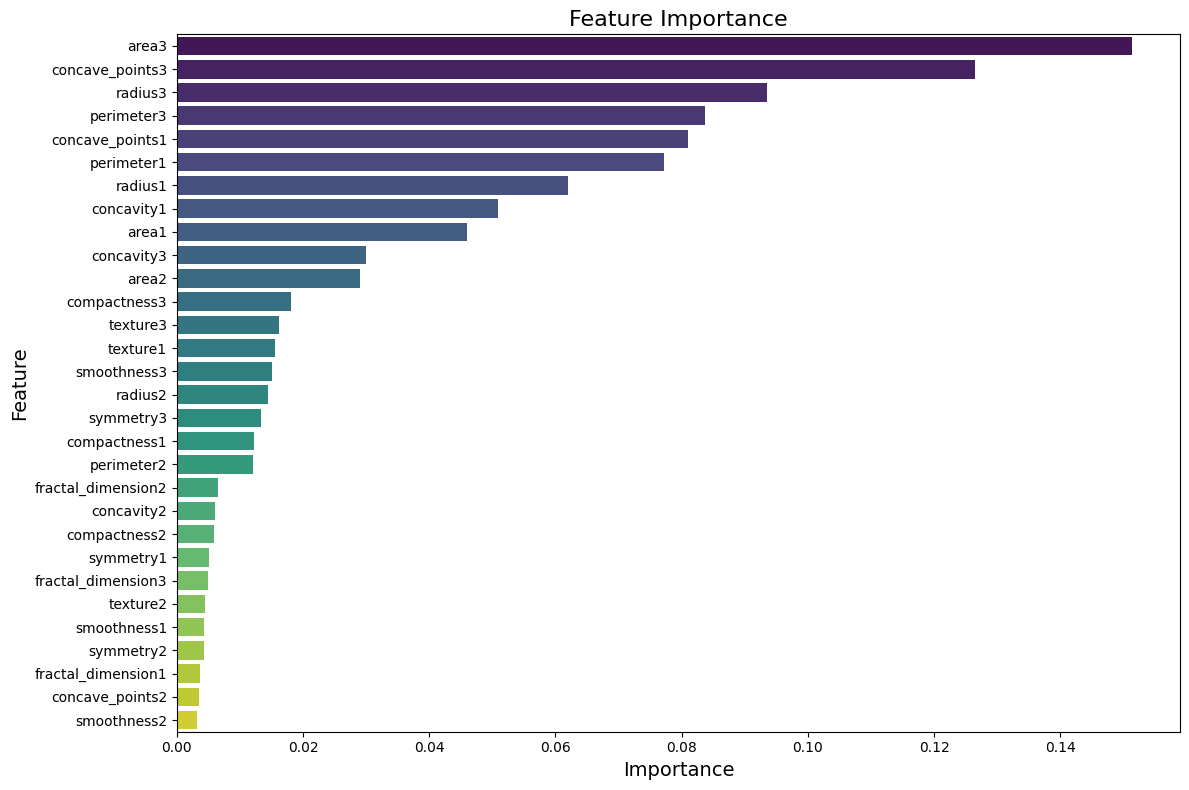

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, df['target'], test_size=0.2, random_state=42, stratify=df['target']
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

### Splitting training and testing data

In [ ]:
# Standardize predictors for numerical stability
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
#Cleaning target variable
y_copy = y.copy()
y_cleaned = y_copy['Diagnosis'].str.strip().str.upper()
y_mapped = y_cleaned.map({'B': 0, 'M': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y_mapped, test_size=0.2, random_state=42, stratify=y
)


### Run a Bayesian Ridge Model for feature importance

In [ ]:
# Initialize and train the model
bayesian_ridge=BayesianRidge()
bayesian_ridge.fit(X_train,y_train)

#Make predictions
ypreds=bayesian_ridge.predict(X_test)
# Convert the predictions to a binary variable instead of a probability
y_pred=np.array(ypreds>0.5,dtype=int)

#Evaluate the model
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {roc_auc:.2f}")

#Feature Importance using BayesRidge
coefficients = bayesian_ridge.coef_
std_devs = np.sqrt(1 / bayesian_ridge.lambda_)  # Standard deviations of the coefficients

# Compute relative importance
relative_importance = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Display results
for i, (coef, importance) in enumerate(zip(coefficients, relative_importance)):
    print(f"Feature {i + 1}: Coefficient = {coef:.4f}, Std Dev = {std_devs:.4f}, Relative Importance = {importance:.2%}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        72
           1       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114


Confusion Matrix:
[[72  0]
 [ 8 34]]

Accuracy: 0.93


NameError: name 'roc_auc_score' is not defined

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': relative_importance
}).sort_values(by='Coefficient', ascending=False)
#plot feature importance from logistic regression
plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients,
    x='Coefficient',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance from Bayesian Ridge Regression', fontsize=16)

In [ ]:
#Plotting ROC AUC curve
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Bayesian Ridge')
display.plot()
plt.title('ROC Curve for Bayesian Ridge')
plt.show()

### After selecting the important features manually, run the PYMC Model

In [ ]:
### Insert code to take modified X_train and X_test containing selected features

In [ ]:
# Step 1: Latent Variable Analysis
with pm.Model() as latent_model:

    #Setting the Training Data
    X=pm.MutableData("X",X_train)
    y=pm.MutableData("y",y_train)

    # Priors for regression coefficients and intercept
    beta = pm.Normal("beta", mu=0, sigma=10, shape=X_train.shape[1])
    intercept = pm.Normal("intercept", mu=0, sigma=10)

    # Latent variable
    z = pm.Deterministic("z", pm.math.dot(X, beta) + intercept)

    # Link function (sigmoid) to get probabilities
    p = pm.Deterministic("p", pm.math.sigmoid(z))

    # Likelihood (Bernoulli for binary diagnosis)
    diagnosis = pm.Bernoulli("diagnosis", p=p, observed=y)

    # Inference
    trace = pm.sample(1000, return_inferencedata=True)

In [ ]:
# Step 2: Posterior Analysis

# Summarize posterior distributions
az.summary(trace)

# Plot posterior distributions for regression coefficients
az.plot_posterior(trace, var_names=["beta", "intercept"])
plt.show()

In [ ]:
# Step 3: Predictive Analysis
# Generate posterior predictive samples
with latent_model:
    # Set test data
    pm.set_data({"X": X_test})
    pm.set_data({"y": y_test})
    #Posterior Prediction samples
    posterior_predictive = pm.sample_posterior_predictive(trace)
print(posterior_predictive.posterior_predictive['diagnosis'])

In [ ]:
# Extract predicted probabilities
predicted_probs = posterior_predictive.posterior_predictive["diagnosis"].mean(axis=0).mean(axis=0)

# Threshold probabilities to get binary predictions
predicted_classes = (predicted_probs > 0.5).astype(int)

# Step 4: Evaluate Model Performance

print("Classification Report:")
print(classification_report(y_test, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

# Accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"\nAccuracy: {accuracy:.2f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, predicted_classes)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Step 5: Visualize Latent Variable (z) Distribution
plt.figure(figsize=(10, 6))
sns.histplot(trace.posterior["z"].values.flatten(), kde=True, bins=30)
plt.title("Posterior Distribution of Latent Variable (z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

### Run a basic Logistic Regression Model


In [ ]:
#Logistic Regression Model Fitting

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=5, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (M)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Optional: Feature coefficients (if needed for interpretation)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        72
           1       1.00      0.36      0.53        42

    accuracy                           0.76       114
   macro avg       0.86      0.68      0.68       114
weighted avg       0.83      0.76      0.73       114


Confusion Matrix:
[[72  0]
 [27 15]]

Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'roc_auc_score' is not defined

In [ ]:
#plot feature importance from logistic regression
plt.figure(figsize=(12, 8))
sns.barplot(
    data=coefficients,
    x='Coefficient',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance from Logistic Regression', fontsize=16)

In [ ]:
#Plot the ROC AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Logistic Regression')
display.plot()
plt.title('ROC Curve for Logistic Regression')
plt.show()